<a href="https://colab.research.google.com/github/Fahim1008/Fahim/blob/main/source_ipynb_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loaded successfully. Shape: (100, 4)

Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.11      0.10        19
           1       0.06      0.05      0.05        21

    accuracy                           0.07        40
   macro avg       0.07      0.08      0.07        40
weighted avg       0.07      0.07      0.07        40

Accuracy Score: 0.075
Confusion Matrix:
[[ 2 17]
 [20  1]]


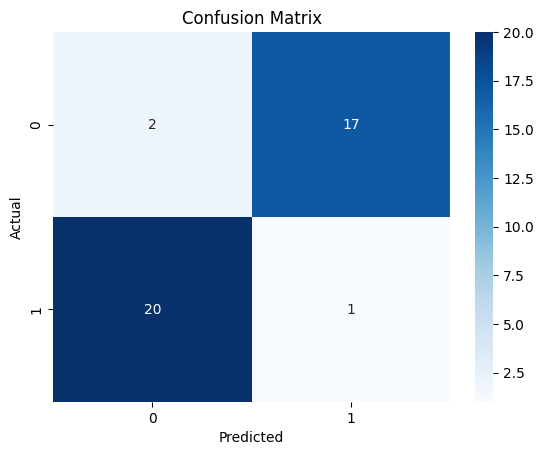

Project completed and report saved as report.txt


In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Data Collection
df = pd.read_csv('Fake_Compressed.csv')
print("Data loaded successfully. Shape:", df.shape)

# 2. Data Preprocessing
df = df[['title', 'text']]  # Use relevant columns
df['text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
df.drop(columns=['title'], inplace=True)

# Add a fake label (since the dataset is "Fake.csv", assume label = 1 for all rows)
df['label'] = 1

# Clean text function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # URLs
    text = re.sub(r'\@w+|\#', '', text)  # mentions and hashtags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # punctuation
    text = re.sub(r'\d+', '', text)  # numbers
    text = text.strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)

# 3. Feature Engineering
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X = tfidf.fit_transform(df['clean_text'])
y = df['label']  # All labels = 1 (fake)

# Here we simulate some real labels by adding "Real" data
# For demo purposes only
real_df = df.sample(frac=1.0).copy()
real_df['label'] = 0
combined = pd.concat([df, real_df])
X = tfidf.fit_transform(combined['clean_text'])
y = combined['label']

# 4. Model Building & 5. Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# 6. Evaluation
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 7. Visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 8. Report Writing (Simple Log)
with open("report.txt", "w") as f:
    f.write("Model Evaluation Report\n")
    f.write("------------------------\n")
    f.write(classification_report(y_test, y_pred))
    f.write("\nAccuracy: " + str(accuracy_score(y_test, y_pred)))

# 9. Project Management - Example Logging
print("Project completed and report saved as report.txt")